In [68]:
pip install pandas_profiling


Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import matplotlib.ticker as ticker
import pandas_profiling
from sklearn.neighbors import KernelDensity
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [69]:
#Loading the datasets
ctrain = pd.read_csv('Cleaned_train.csv')
test = pd.read_csv('test.csv')
cweather = pd.read_csv('Cleaned_weather.csv')
cspray = pd.read_csv('Cleaned_spray.csv')


In [70]:
merged_df = pd.merge(cweather, ctrain, on=['Date', 'Year', 'Week', 'Month', 'DayOfWeek'])

In [71]:
merged_df.to_csv("Merged Data.csv", index = False)

In [72]:
#Use heatmap to find the correlation
def heatmap(df):
    fix, ax = plt.subplots(figsize=(22,22))

    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(df.corr(), mask=mask, ax=ax, cmap='coolwarm',vmin=-1, vmax=1,
                     square=True, linewidth=1,annot=True,annot_kws={'size':'13'},
                     cbar_kws={"shrink": 0.8}, fmt='.1g',center=0)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    ax.set_title('Correlation Heatmap for Merged Data', fontsize=22);

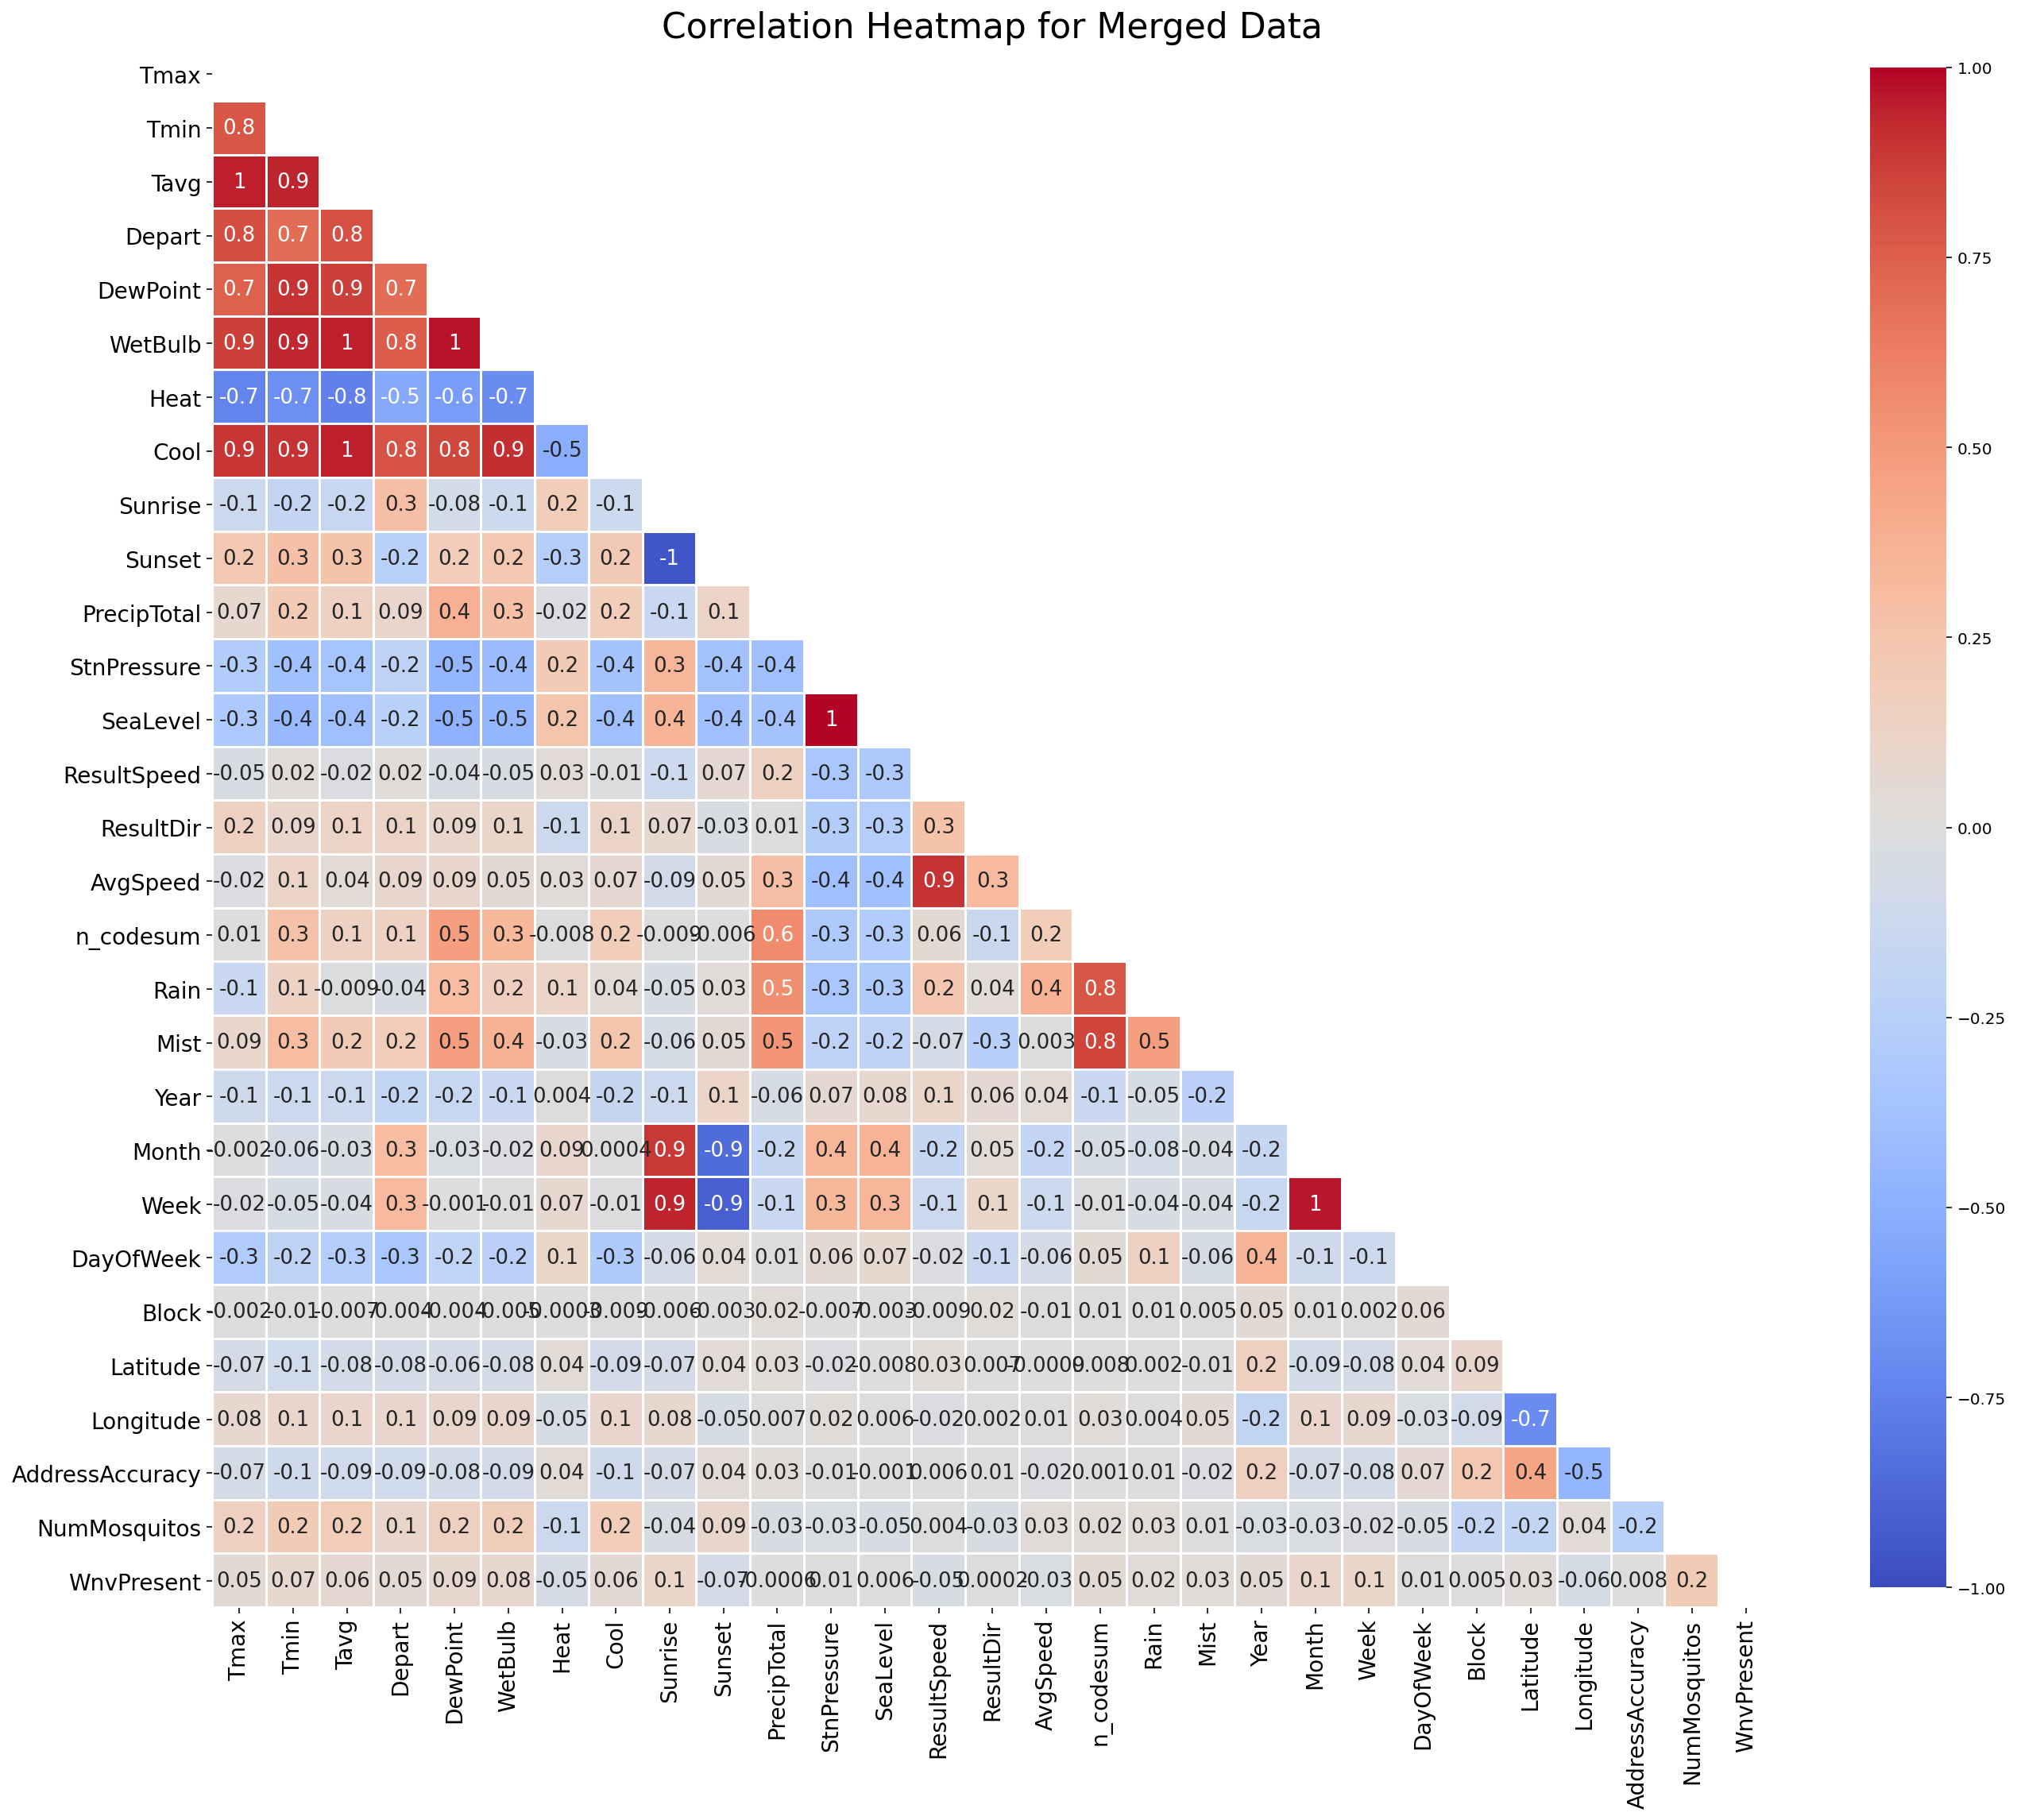

In [73]:
heatmap(merged_df)

In [74]:
mapdata = np.loadtxt("mapdata_copyright_openstreetmap_contributors.txt")

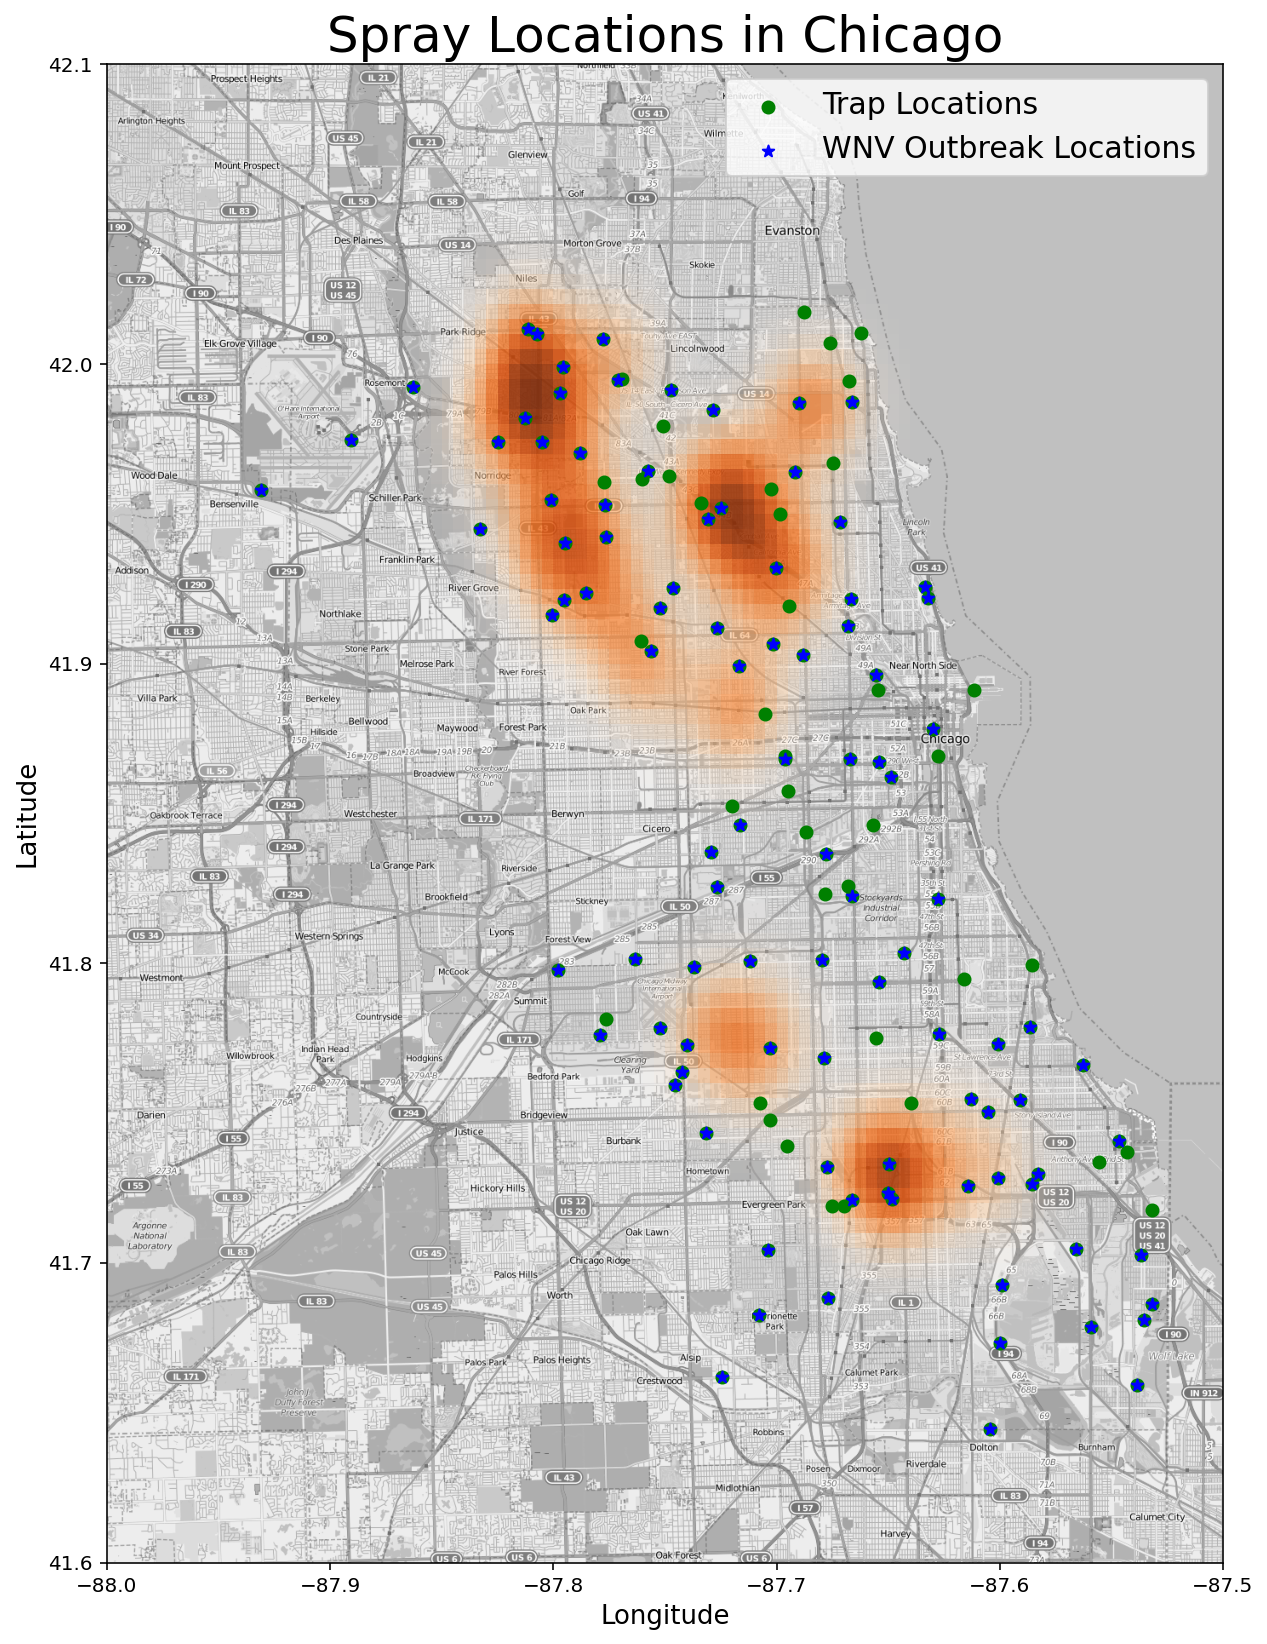

In [75]:
alpha_cm = plt.cm.Oranges
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Spray location
X = cspray[['Longitude', 'Latitude']].drop_duplicates().values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#Kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
trap_locations = ctrain[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_locations[:,0], trap_locations[:,1], marker='o', c='g', label='Trap Locations')

#WNv outbreak locations
wnv_locations = ctrain[ctrain['WnvPresent'] != 0][['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(wnv_locations[:,0], wnv_locations[:,1], marker='*', c='b', label='WNV Outbreak Locations')

plt.title('Spray Locations in Chicago', fontsize=25)
plt.legend(fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.savefig('Spray Locations.png')

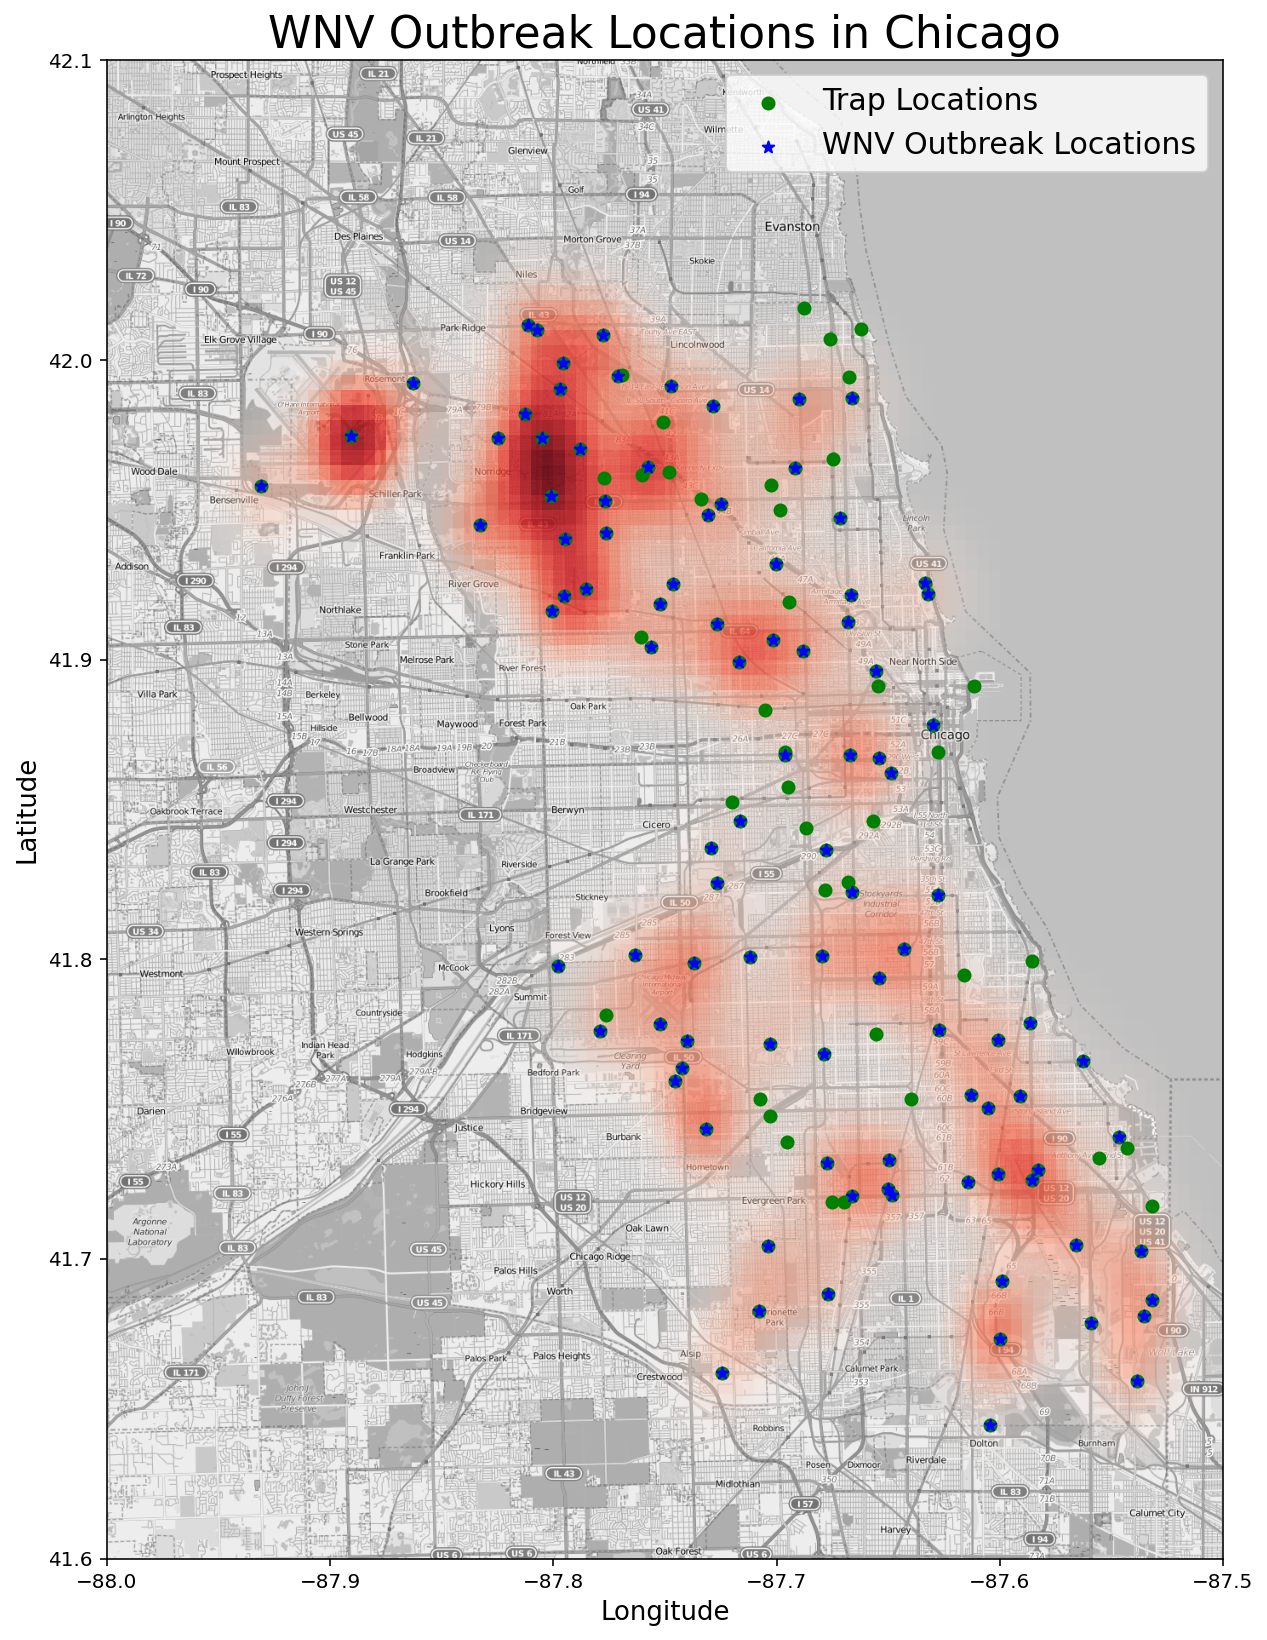

In [76]:
alpha_cm1 = plt.cm.Reds
alpha_cm1._init()
alpha_cm1._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm1.N) / 10 - 1)[::-1]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
wnv = ctrain[ctrain['WnvPresent'] == 1]
wnv = wnv.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X1 = wnv[['Longitude', 'Latitude']].values
kd1 = KernelDensity(bandwidth=0.015)
kd1.fit(X1)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv1 = np.exp(kd1.score_samples(gridpoints).reshape(100,100))

#Kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv1, origin='lower', cmap=alpha_cm1, extent=lon_lat_box, aspect=aspect)

#Trap locations
trap_locations = ctrain[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_locations[:,0], trap_locations[:,1], marker='o', c='g', label='Trap Locations')

#WNv outbreak locations
wnv_locations = ctrain[ctrain['WnvPresent'] != 0][['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(wnv_locations[:,0], wnv_locations[:,1], marker='*', c='b', label='WNV Outbreak Locations')

plt.title('WNV Outbreak Locations in Chicago', fontsize = 22)
plt.legend(fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.savefig('WNV Outbreak Locations.png')

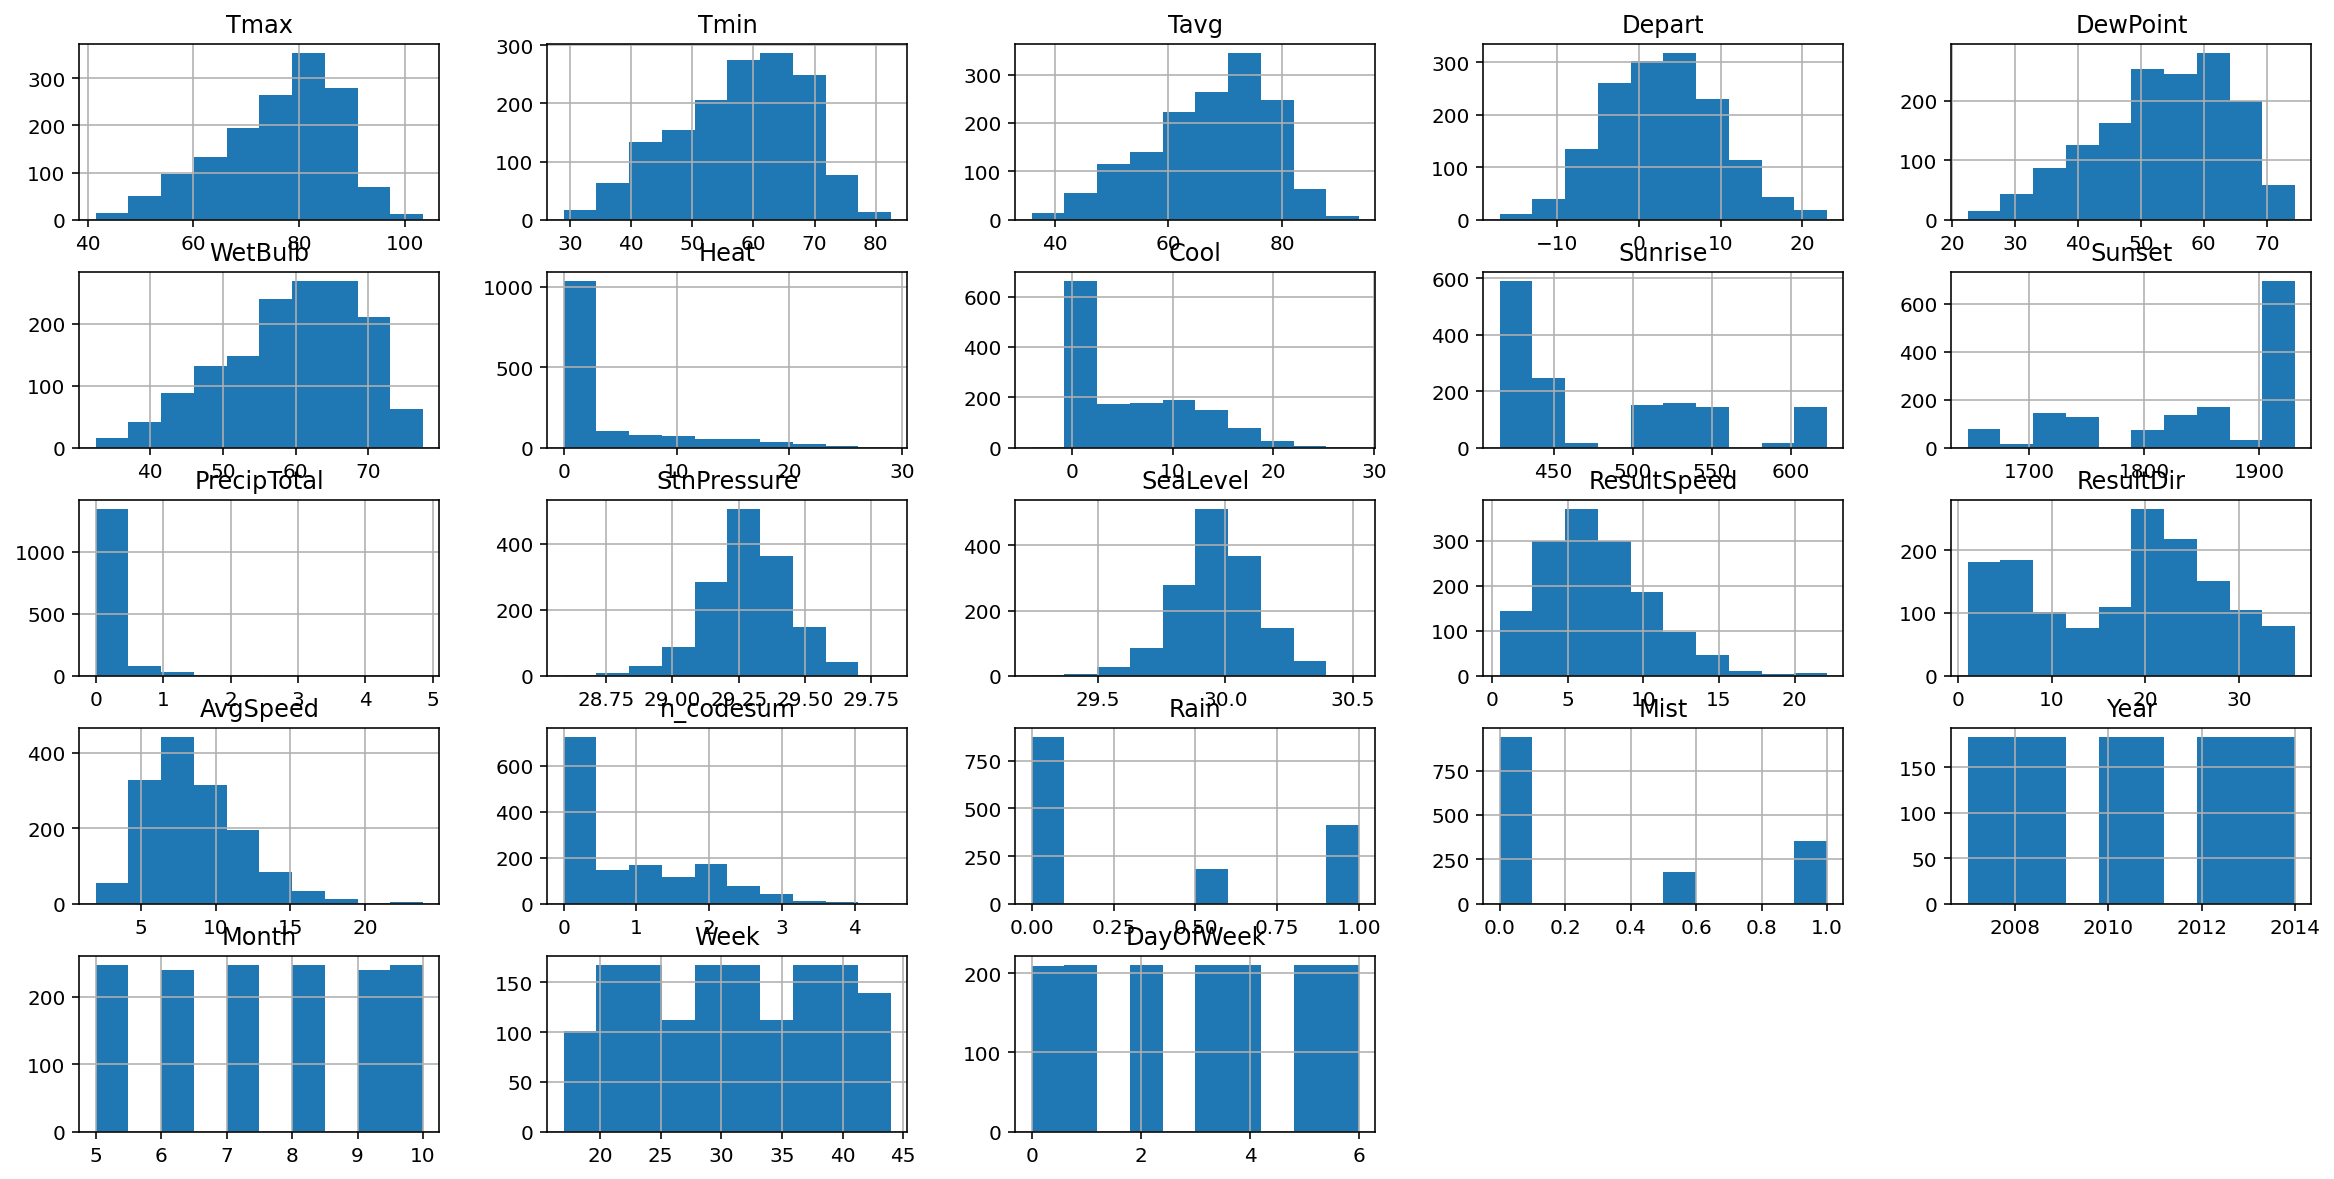

In [77]:
#Plot distribution of numerical variables 
cweather.hist(figsize=(20,10));

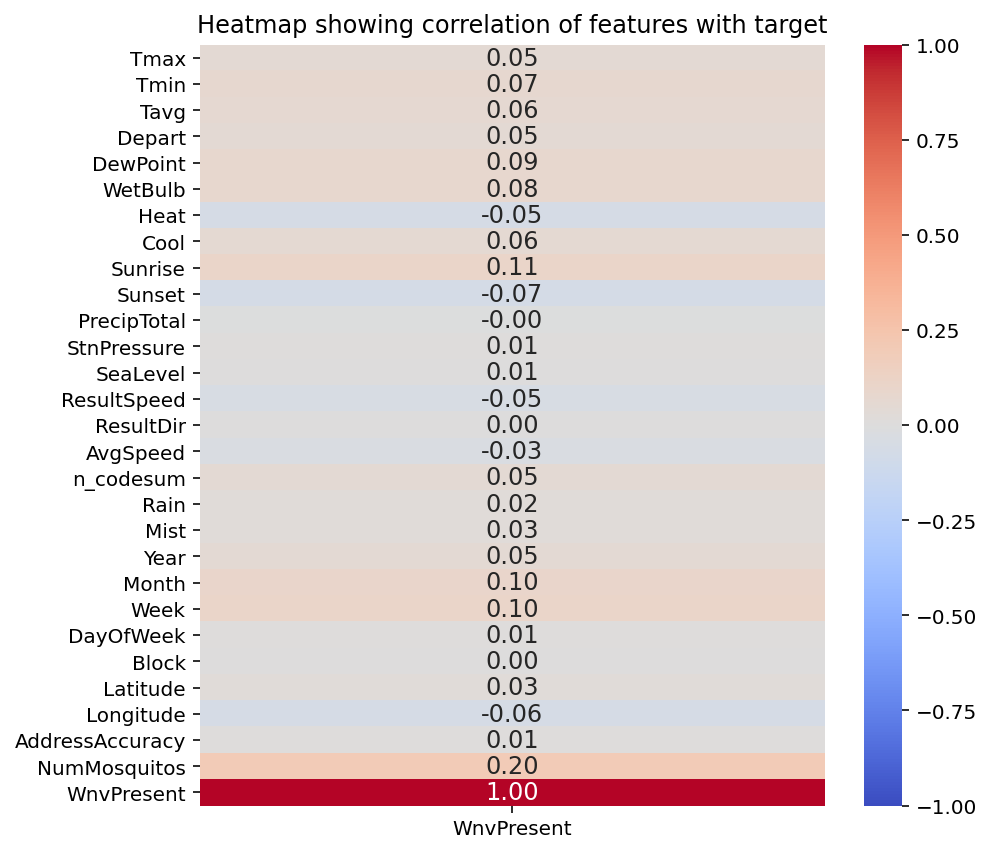

In [78]:
plt.figure(figsize=(7,7))
plt.title("Heatmap showing correlation of features with target")
sns.heatmap(merged_df.corr()[["WnvPresent"]], annot=True, cmap="coolwarm", 
           fmt=".2f", annot_kws={"size":12}, vmin=-1, vmax=1);